<a href="https://colab.research.google.com/github/ajdduck/UOS_LinearRegression/blob/master/HW_5_Q8(15%2C_19%2C_21).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv("/content/drive/My Drive/CH01PR20.txt", names=['Y', 'X1'])

In [0]:
df_quality = pd.read_csv("/content/drive/My Drive/copier_maintenance_additional.txt", names = ["X2"])

In [0]:
df = pd.concat([df, df_quality], axis=1)
df.head()

,Y,X1,X2
0,20,2,1
1,60,4,0
2,46,3,0
3,41,2,0
4,12,1,0


In [0]:
y = df['Y']
X = df[['X1', 'X2']]

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     473.9
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           1.52e-29
Time:                        03:15:23   Log-Likelihood:                -161.23
No. Observations:                  45   AIC:                             328.5
Df Residuals:                      42   BIC:                             333.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9225      3.100     -0.298      0.767      -7.178       5.333
X1            15.0461      0.490     30.706      0.000      14.057      16.035
X2             0.7587      2.780      0.273      0.786      -4.851       6.369
==============================================================================
Omnibus:                        1.360   Durbin-Watson:                   2.406
Prob(Omnibus):                  0.507   Jarque-Bera (JB):                1.215
Skew:                          -0.387   Prob(JB):                        0.545
Kurtosis:                       2.778   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ***Q8.15***

Part(a).

Beta0 means that when the number of copiers serviced is zeros and model is small, the number of minutes spent on the service call's result.

Beta1 means the change that the number of copiers serviced has to the number of minutes spent on the service call when the number of copiers serviced changes by one unit.

Beta2 indicates how much higher or lower the response function for small model is than the one for Large model, for any given the number of copiers serviced.

Part(b). 

Y_hat = -0.9225 + 15.0461*X1 + 0.7587*X2

Part(c).

beta2'CI '-4.851<= beta2 <=	6.369'

That means with 95% percent confidence, we conclude that small model tend to spend more time somewhere between -4.8 and 6.3, on the average, than large model for any given the number of copiers serviced.

Part(d).

Since the model assumes equal slopes and the same constant error term variance for each type of model, the common slope 'beta1' can best be estimated by pooling the two types of model.

And 'beta0' and 'beta2' can be made more precisely by working with one regression model containing an indicator variable since more degrees of freedom will then be associated with MSE.

Part(e).

When X1X2=0, there are two residual values that are out of range between -15 and 15. Given that, an interaction term in regression model may be helpful.

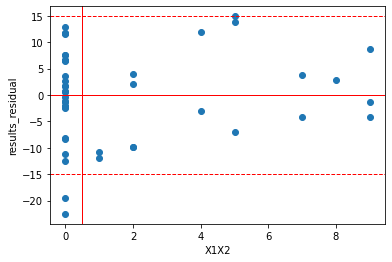

In [0]:
# residual plot against X1X2

plt.scatter(x = df['X1']*df['X2'], y = results.resid)
plt.axhline(y = 0, color = 'red', linewidth = 1)
plt.axhline(y = 15, color = 'red', linestyle = '--', linewidth = 1)
plt.axhline(y = -15, color = 'red', linestyle = '--', linewidth = 1)
plt.axvline(x=0.5, color = 'red', linewidth = 1 )
plt.xlabel("X1X2")
plt.ylabel("results_residual")
plt.show()

# ***Q1. Part(b)***

'y_hat_small' function is a function that is parallel to the y-axis by beta2 from 'y_hat_large'.

In [0]:
y_hat_small = results.params[0] + results.params[1]*df['X1'] + results.params[2]*1
y_hat_large = results.params[0] + results.params[1]*df['X1'] + results.params[2]*0

y_hat_small = y_hat_small.to_frame()
y_hat_large = y_hat_large.to_frame()

y_hat_small = pd.DataFrame({'X1': df['X1'], 'y_hat_small': y_hat_small['X1']})
y_hat_large = pd.DataFrame({'X1': df['X1'], 'y_hat_large': y_hat_large['X1']})

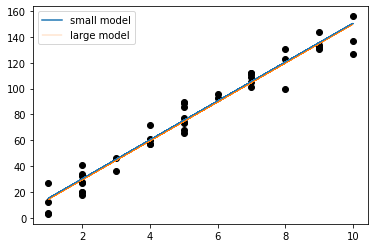

In [0]:
plt.plot('X1', 'y_hat_small', data = y_hat_small, label = 'small model')
plt.plot('X1', 'y_hat_large', data = y_hat_large, linewidth = 0.3, label = 'large model')
plt.scatter(df['X1'], df['Y'], color = 'black')
plt.legend()
plt.show()

In [0]:
df = pd.DataFrame({'Y': df['Y'], 'X1': df['X1'], 'X2': df['X2'], 'X1X2': df['X1']*df['X2']})
df.head()

,Y,X1,X2,X1X2
0,20,2,1,2
1,60,4,0,0
2,46,3,0,0
3,41,2,0,0
4,12,1,0,0


# ***Q8.19***

Part(a).

Y_hat = 2.8131 + 14.3394*X1 -8.1412*X2 + 1.7774*X1X2

Part(b).

beta3's t-value is 1.824 and t(0.95, 41) is 1.6828780004112913.

Because 1.824 > 1.6828780004112913, H0(beta3 = 0) is rejected. 
And P-value is 0.075

So we conclude that the interation term cannot be dropped from this regerssion model.

Beta3 is difference in slope between small model and large model. In other words, the difference in the mean number of minutes spent on the service call, when the number of copiers service changes by 1 unit, is beta3 higer for small model compared to large model.

In [0]:
y = df['Y']
X = df[['X1', 'X2', 'X1X2']]

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     334.6
Date:                Sat, 13 Jun 2020   Prob (F-statistic):           7.60e-29
Time:                        03:15:23   Log-Likelihood:                -159.48
No. Observations:                  45   AIC:                             327.0
Df Residuals:                      41   BIC:                             334.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8131      3.647      0.771      0.445      -4.552      10.178
X1            14.3394      0.615     23.333      0.000      13.098      15.581
X2            -8.1412      5.580     -1.459      0.152     -19.410       3.128
X1X2           1.7774      0.975      1.824      0.075      -0.191       3.746
==============================================================================
Omnibus:                        0.997   Durbin-Watson:                   2.520
Prob(Omnibus):                  0.607   Jarque-Bera (JB):                0.905
Skew:                          -0.114   Prob(JB):                        0.636
Kurtosis:                       2.344   Cond. No.                         30.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
t_critical = scipy.stats.t.ppf(q = 0.95, df = 41)
t_critical

1.6828780004112913

# ***Q1. Part(b)***

Beta3 is difference in slope between small model and large model. In other words, the difference in the mean number of minutes spent on the service call, when the number of copiers service changes by 1 unit, is beta3 higer for small model compared to large model.

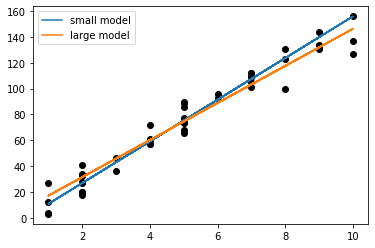

In [0]:
y_hat_small = results.params[0] + results.params[1]*df['X1'] + results.params[2]*1 + results.params[3]*df['X1']
y_hat_large = results.params[0] + results.params[1]*df['X1'] + results.params[2]*0 + results.params[3]*0

y_hat_small = y_hat_small.to_frame()
y_hat_large = y_hat_large.to_frame()

y_hat_small = pd.DataFrame({'X1': df['X1'], 'y_hat_small': y_hat_small['X1']})
y_hat_large = pd.DataFrame({'X1': df['X1'], 'y_hat_large': y_hat_large['X1']})

plt.plot('X1', 'y_hat_small', data = y_hat_small, label = "small model")
plt.plot('X1', 'y_hat_large', data = y_hat_large, label = "large model")
plt.scatter(df['X1'], df['Y'], color = 'black')
plt.legend()
plt.show()

# ***Q8. 21***

Part(a).

Hard hat(X2 = 1, X3 = 0): E{Y} = beta0 + beta2 + beta1*X1

Bump cap(X2 = 0, X3 = 1): E{Y} = beta0 + beta3 + beta1*X1

None(X2 = 0, X3 = 0): E{Y} = beta0 + beta1*X1

Part(b).

(1) H0: beta3 <= 0
    , Ha: beta > 0

(2) H0: beta2 = beta3
    , Ha: beta2 != beta3